# Exploratory Data Analysis

**Goal** 

Explore and visualize the demographic, social, and economic structure and dynamics of Cologne over years.

## Setup & Imports

In [91]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe
import matplotlib.patches as mpatches
plt.style.use("seaborn-v0_8")

import seaborn as sns

import geopandas as gpd


## Load data

In [92]:
DATA_PROCESSED = Path('../data/processed/cologne_data_clean_v1.csv')

df = pd.read_csv(DATA_PROCESSED, low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             8892 non-null   int64  
 1   area_code                        8892 non-null   int64  
 2   area                             8892 non-null   object 
 3   area_level_code                  8892 non-null   int64  
 4   area_level                       8892 non-null   object 
 5   avg_age_total                    8879 non-null   float64
 6   avg_age_male                     8879 non-null   float64
 7   avg_age_female                   8879 non-null   float64
 8   avg_age_german                   8879 non-null   float64
 9   avg_age_non_german               8879 non-null   float64
 10  population_total                 8879 non-null   float64
 11  non_german_total                 8879 non-null   float64
 12  non_german_share    

## Filtered views

In [93]:
CITY = 0
DISTRICTS = 1
NEIGHBORHOODS = 2
STATISTICAL_BLOCKS = 3
SOCIAL_SPACES = 4

df_city = df[df.area_level_code == CITY]
df_districts = df[df.area_level_code == DISTRICTS]
df_neighborhoods = df[df.area_level_code == NEIGHBORHOODS]
df_statistical_blocks = df[df.area_level_code == STATISTICAL_BLOCKS]
df_social_spaces = df[df.area_level_code == SOCIAL_SPACES]

## Quick checks

In [94]:
latest_year = df['year'].max()
earliest_year = df['year'].min()

print(earliest_year, latest_year)

2012 2024


### Missing values (by area level)

In [95]:
df.groupby('area_level_code')[df.select_dtypes(include=["float64"]).columns].apply(lambda x: x.isna().mean()).T

area_level_code,0,1,2,3,4
avg_age_total,0.0,0.000000,0.000000,0.000000,0.055556
avg_age_male,0.0,0.000000,0.000000,0.000000,0.055556
avg_age_female,0.0,0.000000,0.000000,0.000000,0.055556
avg_age_german,0.0,0.000000,0.000000,0.000000,0.055556
avg_age_non_german,0.0,0.000000,0.000000,0.000000,0.055556
population_total,0.0,0.000000,0.000000,0.000000,0.055556
non_german_total,0.0,0.000000,0.000000,0.000000,0.055556
non_german_share,0.0,0.000000,0.000000,0.000000,0.055556
migration_background_total,0.0,0.000000,0.000000,0.000000,0.055556
migration_background_share,0.0,0.000000,0.000000,0.000000,0.055556


Most indicators are fully available at city, district, and neighborhood level, while statistical blocks and social spaces show substantial structural missingness. In this project I focus on city (trends) and districts (comparisons).

In [96]:
df_districts.groupby('year')[['new_registered_electric_cars', 'registered_electric_cars']].apply(lambda x: x.isna().mean())

,new_registered_electric_cars,registered_electric_cars
year,,
2012,0.222222,0.222222
2013,0.333333,0.222222
2014,0.444444,0.111111
2015,0.555556,0.000000
2016,0.222222,0.000000
2017,0.000000,0.000000
2018,0.000000,0.000000
2019,0.000000,0.000000
2020,0.000000,0.000000


### Co-missingness

In [97]:
# df.isna().corr()

### Duplicates

In [98]:
df.duplicated(subset=['year','area_code']).sum()

np.int64(0)

## Area Levels & Coverage

The dataset is hierarchical and covers multiple administrative levels of Cologne.
Each row represents one area in one year.

Gesamtstadt	(0) - Entire city 

Stadtbezirke (1) - 9 Districts  

Stadtteile (2) - 86 Neighborhoods 

Statistische Quartiere (3) - 570 Statistical blocks

Sozialräume (4) - 18 Social spaces

In [99]:
df['area_level'].value_counts()

area_level
Statistische Quartiere    7410
Stadtteile                1118
Sozialräume                234
Stadtbezirke               117
Gesamtstadt                 13
Name: count, dtype: int64

In [100]:
df.groupby(['year', 'area_level']).size().unstack(fill_value=0)

area_level,Gesamtstadt,Sozialräume,Stadtbezirke,Stadtteile,Statistische Quartiere
year,,,,,
2012,1,18,9,86,570
2013,1,18,9,86,570
2014,1,18,9,86,570
2015,1,18,9,86,570
2016,1,18,9,86,570
2017,1,18,9,86,570
2018,1,18,9,86,570
2019,1,18,9,86,570
2020,1,18,9,86,570


## Spatial structure

In [101]:
GEO_DIR = Path('../data/geo')
SHAPE_DISTRICTS = GEO_DIR / 'Stadtbezirk/Stadtbezirk.shp'
SHAPE_NEIGHBORHOODS = GEO_DIR / 'Stadtteil/Stadtteil.shp'
SHAPE_STAT_BLOCKS = GEO_DIR / 'Statistisches_Quartier/Statistisches_Quartier.shp'

In [102]:
gdf_d = gpd.read_file(SHAPE_DISTRICTS)
gdf_n = gpd.read_file(SHAPE_NEIGHBORHOODS)
gdf_sb = gpd.read_file(SHAPE_STAT_BLOCKS)

Quick look

In [103]:
gdf_d.columns, gdf_d.head(2), gdf_d.crs # The Coordinate Reference System

(Index(['nummer', 'name', 'flaeche', 'geometry'], dtype='object'),
   nummer          name       flaeche  \
 0      1    Innenstadt  1.640542e+07   
 1      2  Rodenkirchen  5.459151e+07   
 
                                             geometry  
 0  POLYGON ((358932.01 5644491.24, 358929.245 564...  
 1  POLYGON ((355322.362 5643194.433, 355334.268 5...  ,
 <Projected CRS: EPSG:25832>
 Name: ETRS89 / UTM zone 32N
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Europe between 6°E and 12°E: Austria; Denmark - onshore and offshore; Germany - onshore and offshore; Italy - onshore and offshore; Norway including Svalbard - onshore and offshore; Spain - offshore.
 - bounds: (6.0, 36.53, 12.01, 84.01)
 Coordinate Operation:
 - name: UTM zone 32N
 - method: Transverse Mercator
 Datum: European Terrestrial Reference System 1989 ensemble
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

## Population dynamics at the city level

### Total population over time

In [104]:
df_city.groupby('year')['population_total'].apply(lambda x: x.sum())

year
2012    1044555.0
2013    1044070.0
2014    1053528.0
2015    1069192.0
2016    1081701.0
2017    1084795.0
2018    1089984.0
2019    1091819.0
2020    1088040.0
2021    1079301.0
2022    1092118.0
2023    1095520.0
2024    1097519.0
Name: population_total, dtype: float64

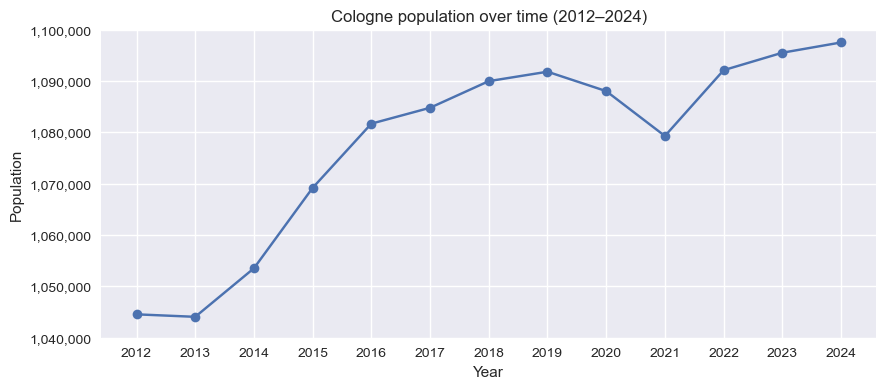

In [105]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(df_city['year'], df_city['population_total'], marker='o')

ax.set_ylim(ymin=1040000.0, ymax=1100000.0)

ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title(f"Cologne population over time ({earliest_year}–{latest_year})")

ax.set_xticks(df_city['year'])

ax.ticklabel_format(style="plain", axis="y")
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f"{int(x):,}")
)

plt.show()

## Population distribution across districts

### Latest year

In [106]:
df_districts_latest = df_districts[df_districts['year'] == latest_year]
df_districts_latest.groupby('area')['population_total'].apply(lambda x: x.sum()).sort_values(ascending=False)

area
Lindenthal      153935.0
Mülheim         150471.0
Innenstadt      127813.0
Kalk            122378.0
Nippes          117688.0
Porz            116483.0
Rodenkirchen    112883.0
Ehrenfeld       111789.0
Chorweiler       84079.0
Name: population_total, dtype: float64

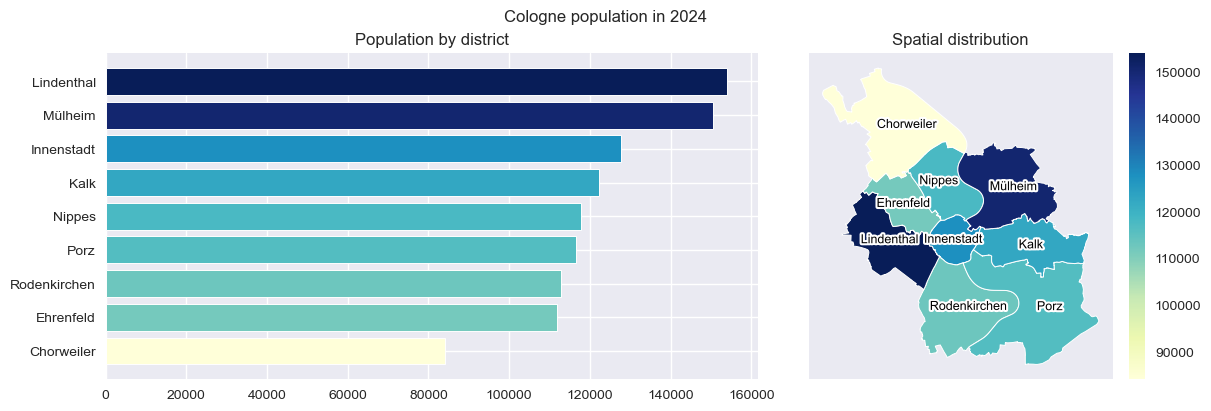

In [107]:
df_temp = df_districts_latest.sort_values('population_total')

gdf_d_2024 = gdf_d.merge(
    df_districts_latest[['area', 'population_total']],
    left_on='name',     
    right_on='area',  
    how='left'
    )

norm = mcolors.Normalize(
    vmin=df_temp['population_total'].min(),
    vmax=df_temp['population_total'].max()
)

cmap = plt.cm.YlGnBu

fig, (ax_bar, ax_map) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"width_ratios": [2, 1]}, constrained_layout=True)

ax_bar.barh(
    df_temp['area'], 
    df_temp['population_total'],
    color=cmap(norm(df_temp['population_total'])),
    edgecolor='white',
    linewidth=0.7
    )

ax_bar.set_title("Population by district")


ax_map.add_patch(
    plt.Rectangle(
        (0,0), 1, 1, 
        facecolor="#EAEAF2", 
        transform=ax_map.transAxes, 
        zorder=-1)
    )

gdf_d_2024.plot(
    ax=ax_map,
    column='population_total',
    cmap=cmap,
    norm=norm,
    legend=True,
    edgecolor='white',
    linewidth=0.7,
    )

for _, row in gdf_d_2024.iterrows():
    x, y = row.geometry.representative_point().coords[0]
    ax_map.text(
        x, y,
        row['name'],
        fontsize=9,
        ha='center',
        va='center',
        color='black',
        path_effects=[pe.withStroke(linewidth=3, foreground='white')]
    )

ax_map.set_title("Spatial distribution")
ax_map.axis("off")

fig.suptitle(f"Cologne population in {latest_year}")

plt.show()



### Population change by district over time

In [108]:
df_temp = df_districts.groupby(['area', 'year'], as_index=False)['population_total'].sum()
colors = plt.cm.tab10(range(len(df_temp['area'].unique())))
color_map = {d: c for d, c in zip(df_temp['area'].unique(), colors)}

gdf_d['plot_color'] = gdf_d['name'].map(color_map)

/var/folders/b7/0lrwcbf52xvccvvdz4wbwfkw0000gn/T/ipykernel_13660/2747125724.py:27: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf_d.plot(


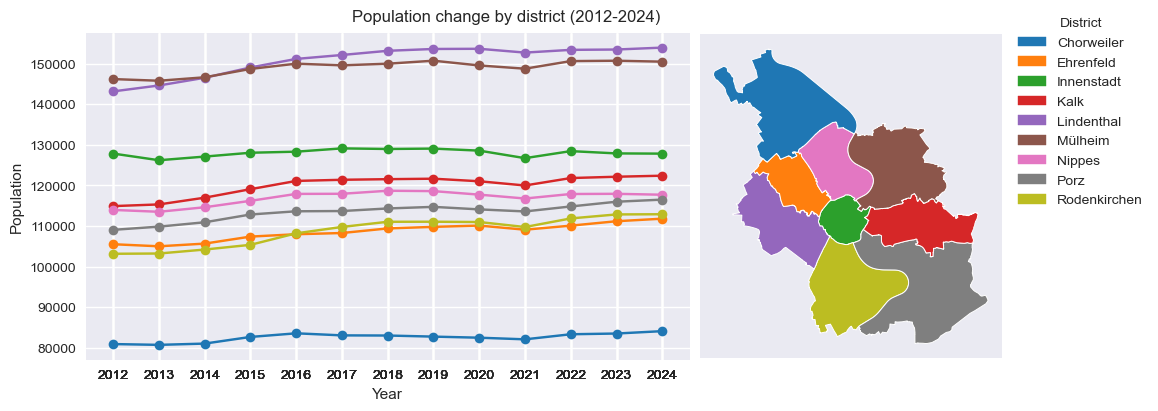

In [109]:
fig, (ax_plot, ax_map) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={"width_ratios": [2, 1]}, constrained_layout=True)

for area in df_temp['area'].unique():
    a = df_temp[df_temp['area'] == area]
    ax_plot.plot(
        a['year'], 
        a['population_total'], 
        marker='o', 
        label=area, 
        color=color_map[area]
        )
    
ax_plot.set_xticks(df_temp['year'])
    
ax_plot.set_xlabel("Year")
ax_plot.set_ylabel("Population")
# ax_plot.set_title("Population change")

ax_map.add_patch(
    plt.Rectangle(
        (0,0), 1, 1, 
        facecolor="#EAEAF2", 
        transform=ax_map.transAxes, 
        zorder=-1)
    )

gdf_d.plot(
    ax=ax_map, 
    edgecolor='white', 
    column='name', 
    categorical=True, 
    color=gdf_d['plot_color'], 
    linewidth=0.7
    )

# ax_map.set_title("Districts")

ax_map.axis("off")

fig.suptitle(f"Population change by district ({earliest_year}-{latest_year})")

handles = [mpatches.Patch(color=color_map[d], label=d) for d in df_temp['area'].unique()]

fig.legend(
    handles=handles,
    title="District", 
    bbox_to_anchor=(1, 1), 
    loc='upper left'
    )

plt.show()



In [110]:
# pivot1 = df_districts.pivot_table(
#     index='year',
#     columns='area',
#     values='population_total',
#     aggfunc='sum'
# )

# pivot1

In [111]:
pop_by_d = df_districts.groupby(['year', 'area'])['population_total'].sum().unstack()
pop_by_d

area,Chorweiler,Ehrenfeld,Innenstadt,Kalk,Lindenthal,Mülheim,Nippes,Porz,Rodenkirchen
year,,,,,,,,,
2012,80895.0,105493.0,127827.0,114885.0,143149.0,146182.0,113945.0,109039.0,103140.0
2013,80700.0,104984.0,126187.0,115301.0,144606.0,145771.0,113487.0,109827.0,103207.0
2014,81013.0,105647.0,127088.0,116962.0,146505.0,146623.0,114604.0,110902.0,104184.0
2015,82653.0,107373.0,128032.0,119055.0,149045.0,148682.0,116187.0,112819.0,105346.0
2016,83546.0,107957.0,128295.0,121089.0,151150.0,149979.0,117892.0,113611.0,108182.0
2017,83036.0,108256.0,129108.0,121372.0,152117.0,149564.0,117921.0,113670.0,109751.0
2018,83000.0,109386.0,128958.0,121521.0,153149.0,149973.0,118668.0,114306.0,111023.0
2019,82732.0,109770.0,129055.0,121637.0,153600.0,150709.0,118577.0,114699.0,111040.0
2020,82464.0,110088.0,128552.0,121007.0,153644.0,149537.0,117710.0,114076.0,110962.0
